# Algunos apuntes para el parcial

## 📈 Seaborn Objects y Seaborn

### Seaborn Objects (sns) es una librería de visualización de datos basada en matplotlib. Seaborn proporciona una interfaz de alto nivel para crear gráficos atractivos y informativos.

### Primero, importamos  `gapminder` que nos va a servir para hacer los ejemplos

In [14]:
from gapminder import gapminder
import seaborn.objects as so

### Vemos qué tipo de datos tenemos en el `dataset`. Observamos que `gapminder` es un `DataFrame` de pandas. Y que cada columna es una `Series` de pandas.

In [15]:
type(gapminder), type(gapminder.country)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Si ponemos solamente `so.Plot()` con los valores necesarios, no vamos a ver nada ya que tenemos que agregar el metodo `add()` para que se muestre el gráfico. 

### Los que casi siempre usamos son 
#### - `so.Line()`
#### - `so.Dot()`
#### - `so.Bar()`
#### - `so.Hist()`

### Graficamos el `gdpPercapita` vs `year`, para ciertos paises en particular. Notar que podemos usar el canal de color para diferenciar los países.

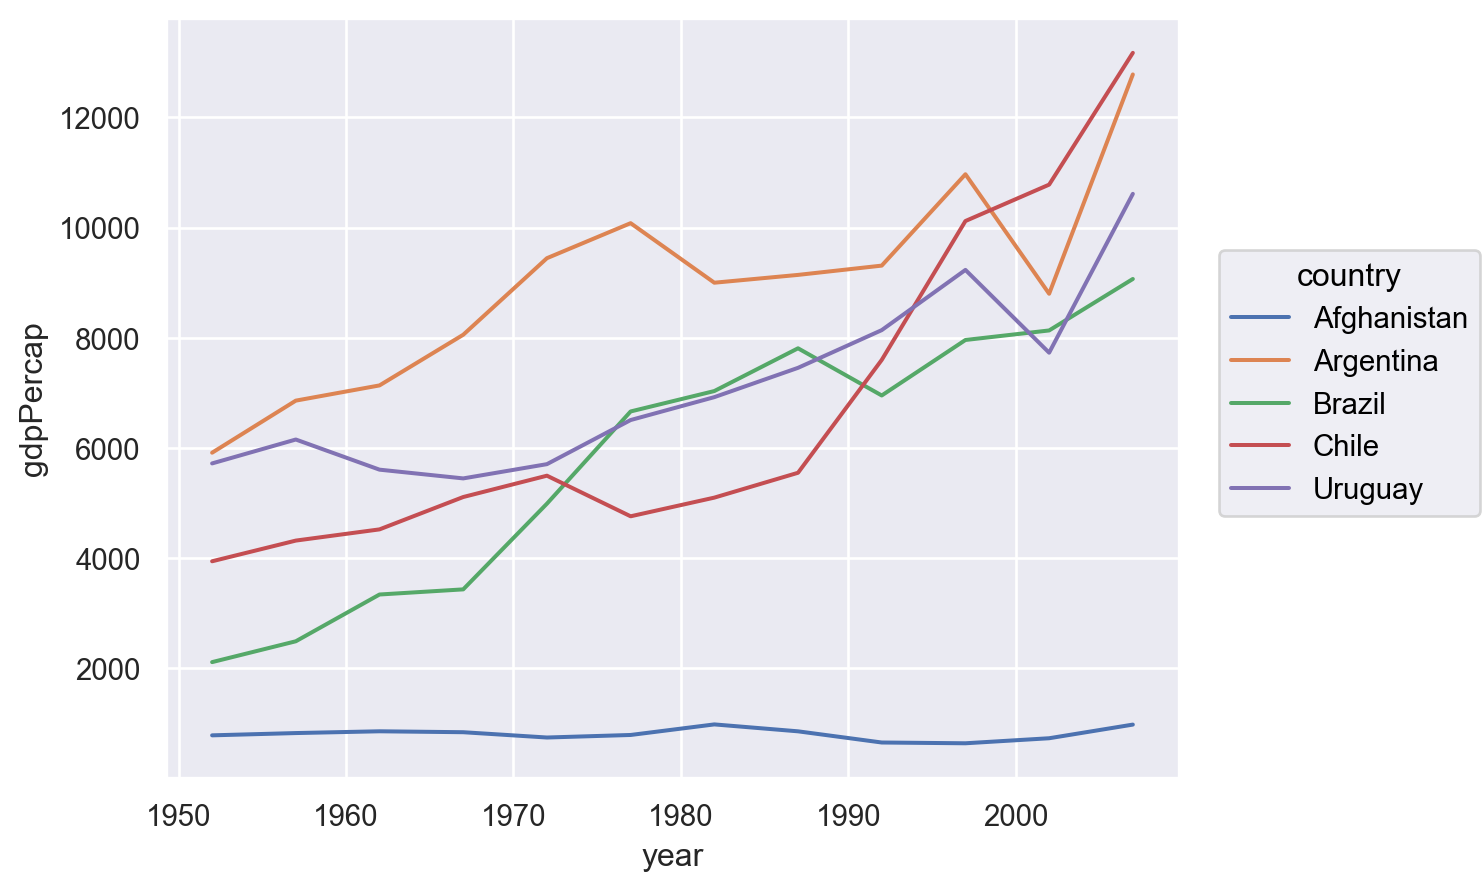

In [16]:
countries_interes = ["Argentina", "Brazil", "Chile", "Uruguay", "Afghanistan"]
(
    so.Plot(
        data=gapminder[gapminder.country.isin(
            countries_interes)],
        x="year",
        y="gdpPercap",
        color="country")
    .add(so.Line())
)

### También podemos calcular su regresión lineal utilizando el método `so.PolyFit()` adentro del método `add()`.

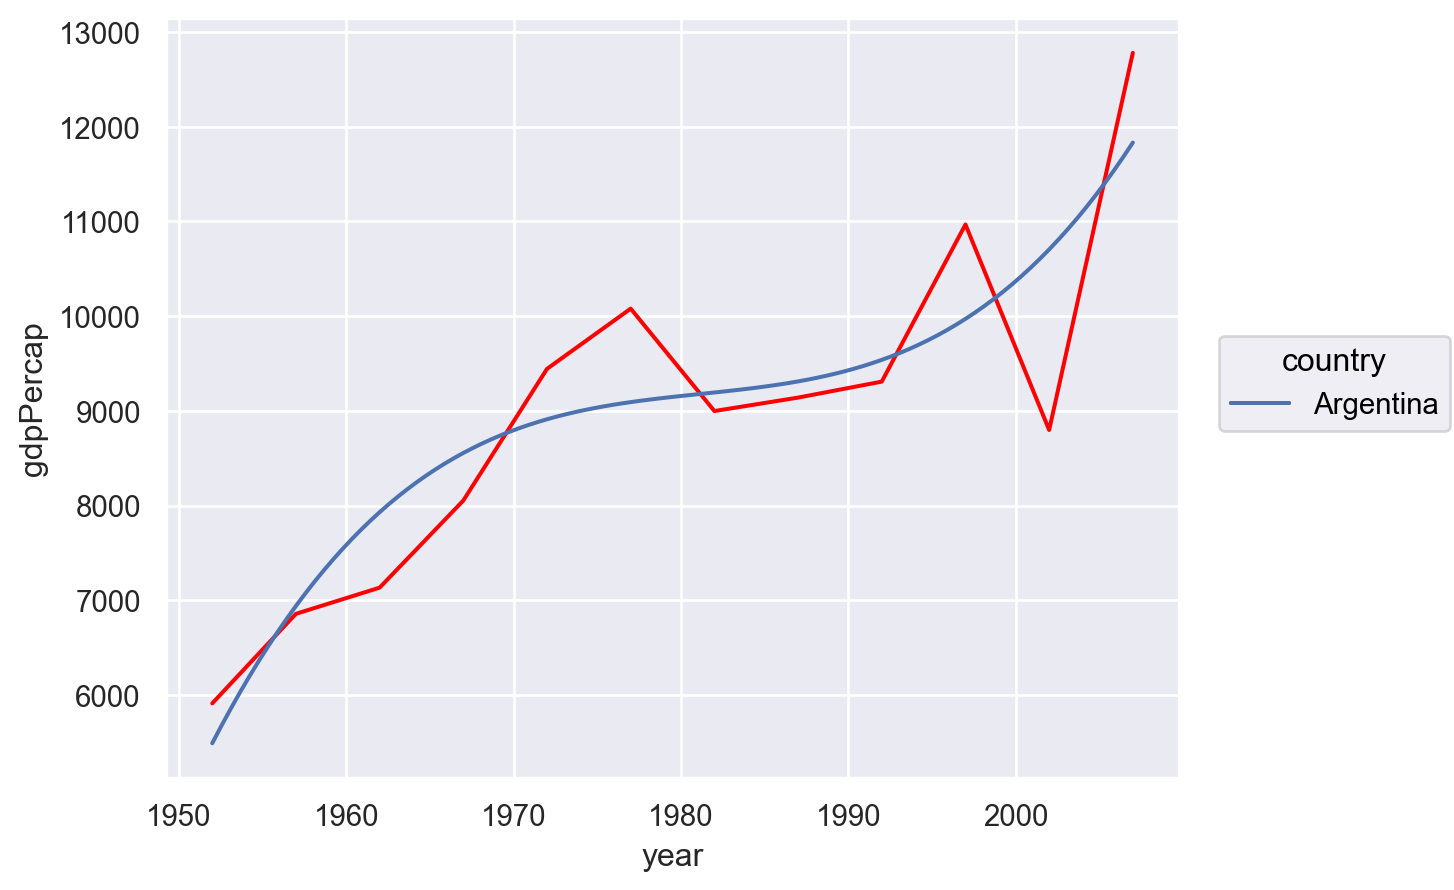

In [17]:
countries_interes = ["Argentina"]
(
    so.Plot(
        data=gapminder[gapminder.country.isin(countries_interes)],
        x="year",
        y="gdpPercap",
        color="country")
    .add(so.Line(color="red"))
    # El número 3 en el argumento representa el grado del polinomio
    .add(so.Line(), so.PolyFit(3))
)

### O podemos crear un histograma con el metodo `Hist()`. Tener en cuenta que el método `Hist()` no necesita de un eje y, ya que se encarga de contar la cantidad de veces que aparece cada valor en el eje x.

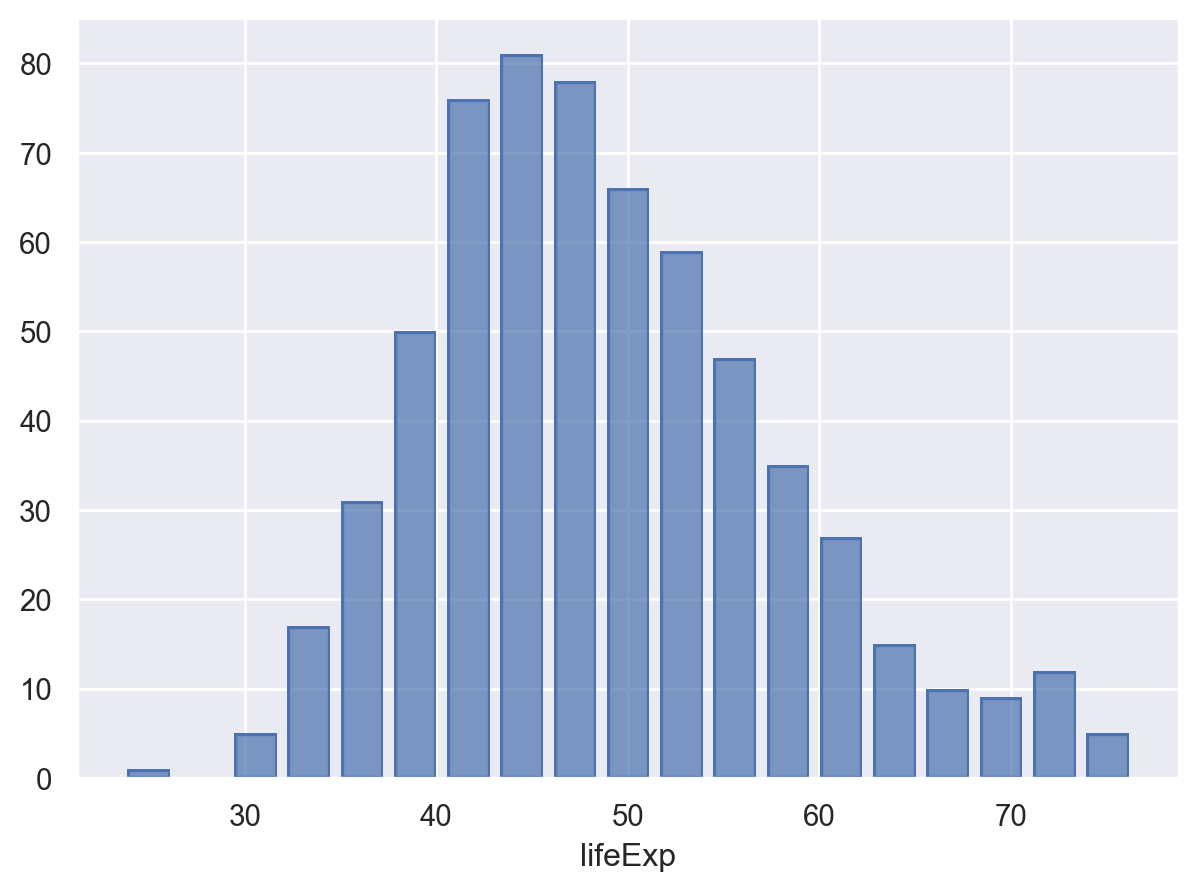

In [18]:
(
    so.Plot(
        data=gapminder[gapminder.continent.isin(["Africa"])], x="lifeExp")
    .add(so.Bar(), so.Hist())
)

### En Seaborn Objects no tenemos la posibilidad de crear box plots. Para los mismos, utilizamos la librería Seaborn.

<Axes: xlabel='gdpPercap'>

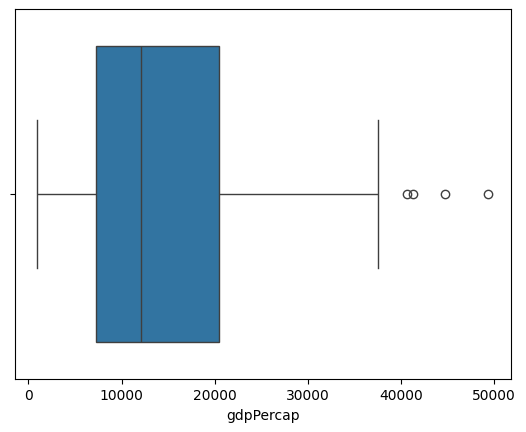

In [19]:
import seaborn as sns

(
    sns.boxplot(
        gapminder[gapminder.continent.isin(["Europe"])],
        x="gdpPercap")
)

### También podemos comparar distintos tipos de datos, agregando la variable `y` a nuestro gráfico.

<Axes: xlabel='gdpPercap', ylabel='continent'>

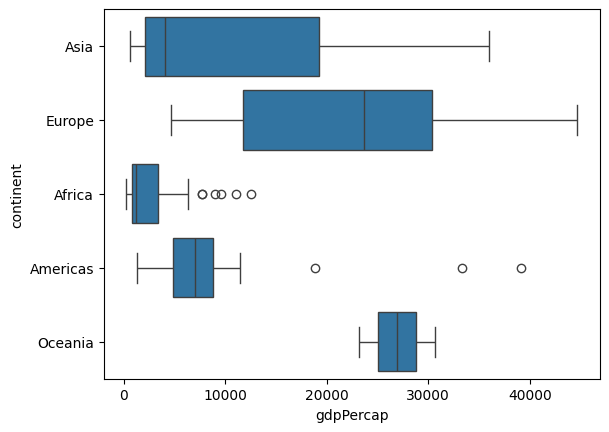

In [20]:
# Esto representa el gdpPercap por cada continente en el año 2002
sns.boxplot(gapminder[gapminder.year==2002], x="gdpPercap", y="continent")

## ⟋ Regresión Lineal

### La regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente Y y las variables independientes X. Este modelo puede ser expresado como:

### $$ Y = \beta_0 + \beta_1 X $$

### Vamos a utilizar el dataset tips de Seaborn para hacer un ejemplo de regresión lineal, analizando lo que se gasta en propinas en función del total de la cuenta.

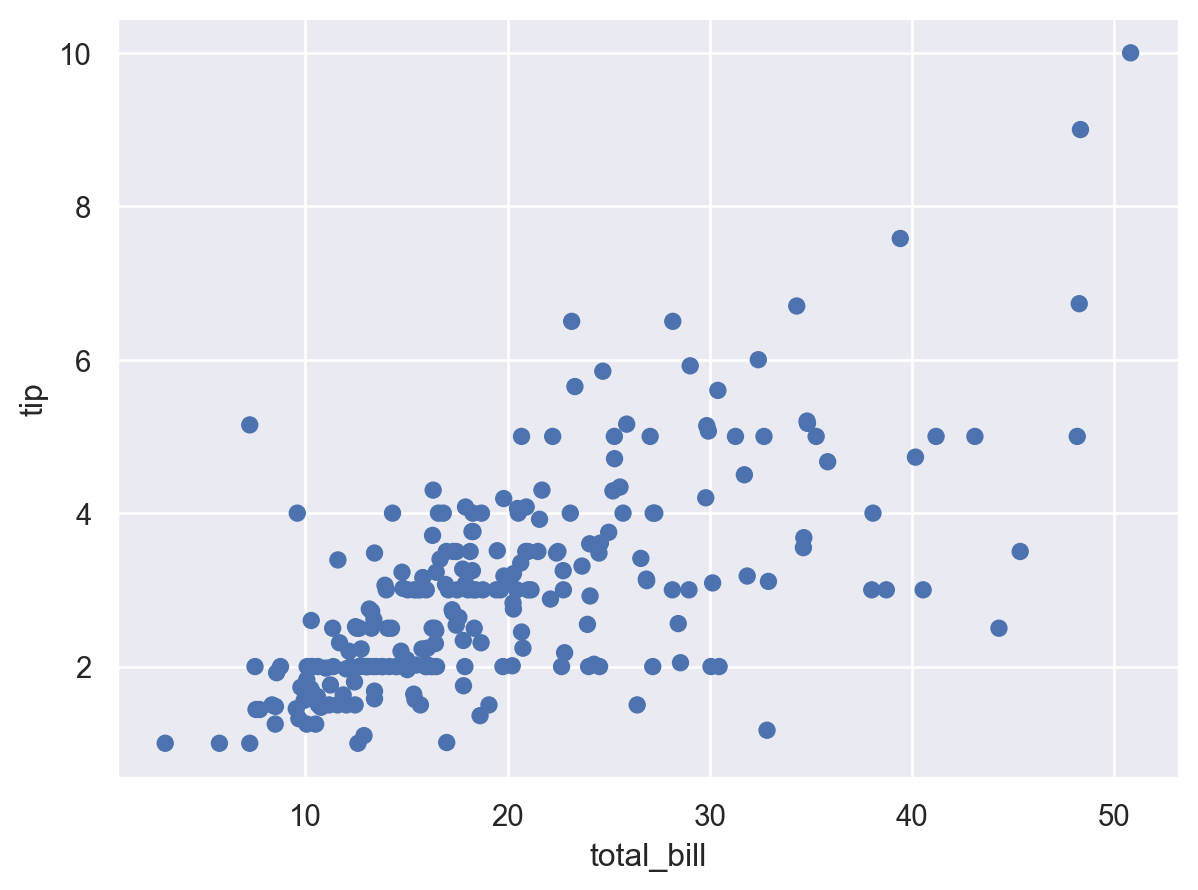

In [21]:
# Importamos librerías necesarias

import seaborn.objects as so

datos_tips = sns.load_dataset('tips')

(
    so.Plot(data=datos_tips, x="total_bill", y="tip")
    .add(so.Dot())
)

### Para hacer una regresión lineal, utilizamos el método `so.PolyFit()` de Seaborn. Prestar atención que va al lado del argumento `so.Line()`!

### El valor 1 adentro del argumento de so.PolyFit() indica el grado del polinomio. En este caso es un polinomio de grado 1.

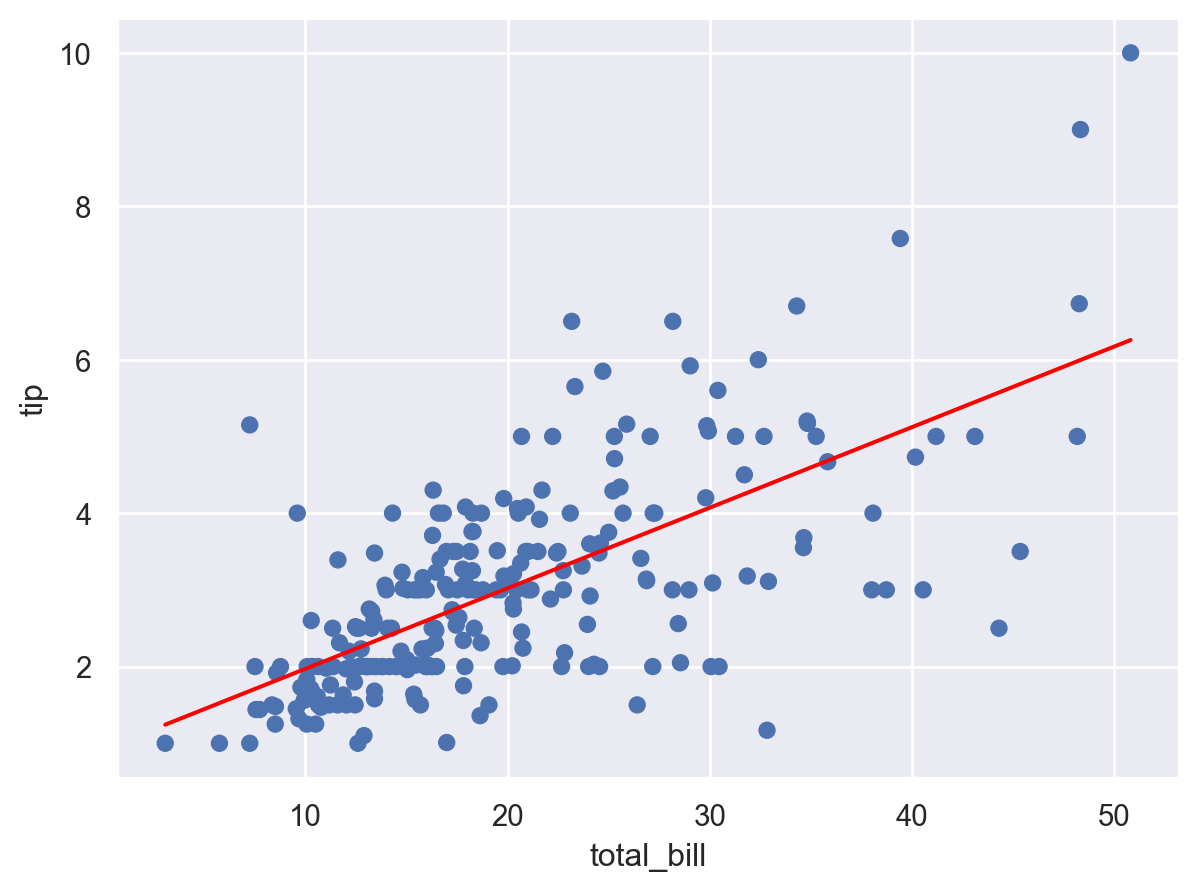

In [22]:

(
    so.Plot(data=datos_tips, x="total_bill", y="tip")
    .add(so.Dot())
    # Agregamos el color rojo para diferenciarla.
    # De nuevo, prestar atención a donde se coloca el argumento del color:
    .add(so.Line(color="red"), so.PolyFit(1))
)

### Calculemos los coeficientes y las predicciones.

### Si bien `seaborn` nos permite hacer regresiones lineales, no nos permite calcular los coeficientes de la regresión. Para ello, utilizamos la librería `sklearn`.

### Los métodos que vamos a utilizar en este modelo son:

### - `fit()`: Ajusta el modelo a los datos.
### - `coef_`: Nos devuelve los coeficientes de la regresión.
### - `intercept_`: Nos devuelve el intercepto u ordenada al origen de la regresión.
### - `predict()`: Nos permite hacer predicciones.

### Notar que el intercepto y los coeficientes se suelen llamar $\beta_0$ y $\beta_1$ respectivamente.

### Métodos `fit()`, `coef_` e `intercept_`

In [23]:
from sklearn import linear_model

# Inicializamos nuestro modelo:
modelo_lineal = linear_model.LinearRegression()

# Ajustamos el modelo a nuestros datos:
modelo_lineal.fit(datos_tips[['total_bill']], datos_tips[['tip']])

# Calculamos los coeficientes, en este caso como tenemos una sola variable,
# es uno solo:
print("Coeficiente principal:", modelo_lineal.coef_)

# Calculamos la ordenada al origen, o también llamado
# intercepto:
print("Ordenada al origen:", modelo_lineal.intercept_)

Coeficiente principal: [[0.10502452]]
Ordenada al origen: [0.92026961]


#### **Algo importante**: Si ven el doble corchete en datos[['total_bill']] es porque estamos pasando un DataFrame de pandas. Esto es necesario para que sklearn pueda trabajar con los datos.

In [24]:
# Veamos la diferencia:
print("Tipo de dato de [['total_bill']]:", type(datos_tips[['total_bill']]))
print("Tipo de dato de ['total_bill']:", type(datos_tips['total_bill']))

Tipo de dato de [['total_bill']]: <class 'pandas.core.frame.DataFrame'>
Tipo de dato de ['total_bill']: <class 'pandas.core.series.Series'>


#### Con esto vemos que la recta que mejor aproxima estos datos es 
#### $$ Y = 0.92 + 0.105 X$$

### Método `predict()`

In [25]:
import pandas as pd

# Creamos el DataFrame con las predicciones que queremos realizar:
valores_a_predecir = pd.DataFrame({
    'total_bill': [120]
})

modelo_lineal.predict(valores_a_predecir)

array([[13.5232117]])

#### Esto significa que si la cuenta es de 120 dólares, la propina va a ser de más o menos 13 dólares.

### Método `r2_score()`


#### El $R^2$ es una medida de desempeño que nos permite ver qué tan bien se ajusta nuestro modelo a los datos. Es un valor entre 0 y 1, donde 1 significa que el modelo se ajusta perfectamente a los datos. Usamos el método `r2_score()` de `sklearn.metrics`.

#### Los dos parámetros que recibe son los valores reales y las predicciones. En este caso, el primer parámetro son los datos originales de tips, y el segundo parámetro son los tips predichos por el modelo. 

#### ¡Ponerlos en ese orden! Sino nos va a dar un valor negativo.

In [26]:
from sklearn.metrics import r2_score

y_pred = modelo_lineal.predict(datos_tips[['total_bill']])

# Primer parámetro: los tips que vienen del DataFrame
# Segundo parámetro: Los tips predichos por mi modelo de todos los datos del DataFrame
print("El R cuadrado de mi modelo lineal es:", r2_score(datos_tips['tip'], y_pred))

El R cuadrado de mi modelo lineal es: 0.45661658635167657


## 〰️ Cuadrados Mínimos

### Es una forma para encontrar no solo una recta, sino un polinomio de grado $n$ que mejor se ajuste a los datos, es decir, buscamos los coeficientes de un polinomio de grado $n$
### $$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \dots + \beta_n X^n$$

### que mejor aproxime a nuestros datos en el sentido de Cuadrados Mínimos. Es decir, buscamos $\beta_1,\dots, \beta_n$ que minimicen:
### $$ RSS(\beta) = \displaystyle\sum_{i=1}^n (y_i - P(x_i))^2 $$


### Método 1: Usar Seaborn Objects

#### Seaborn Objects nos permite utiilzar un polinomio de grado n con el método `so.PolyFit()`. El mismo, recibe un argumento que indica el grado del polinomio.

#### Hagamos un ejemplo con un polinomio de grado 3, utilizando el dataset de gapminder.

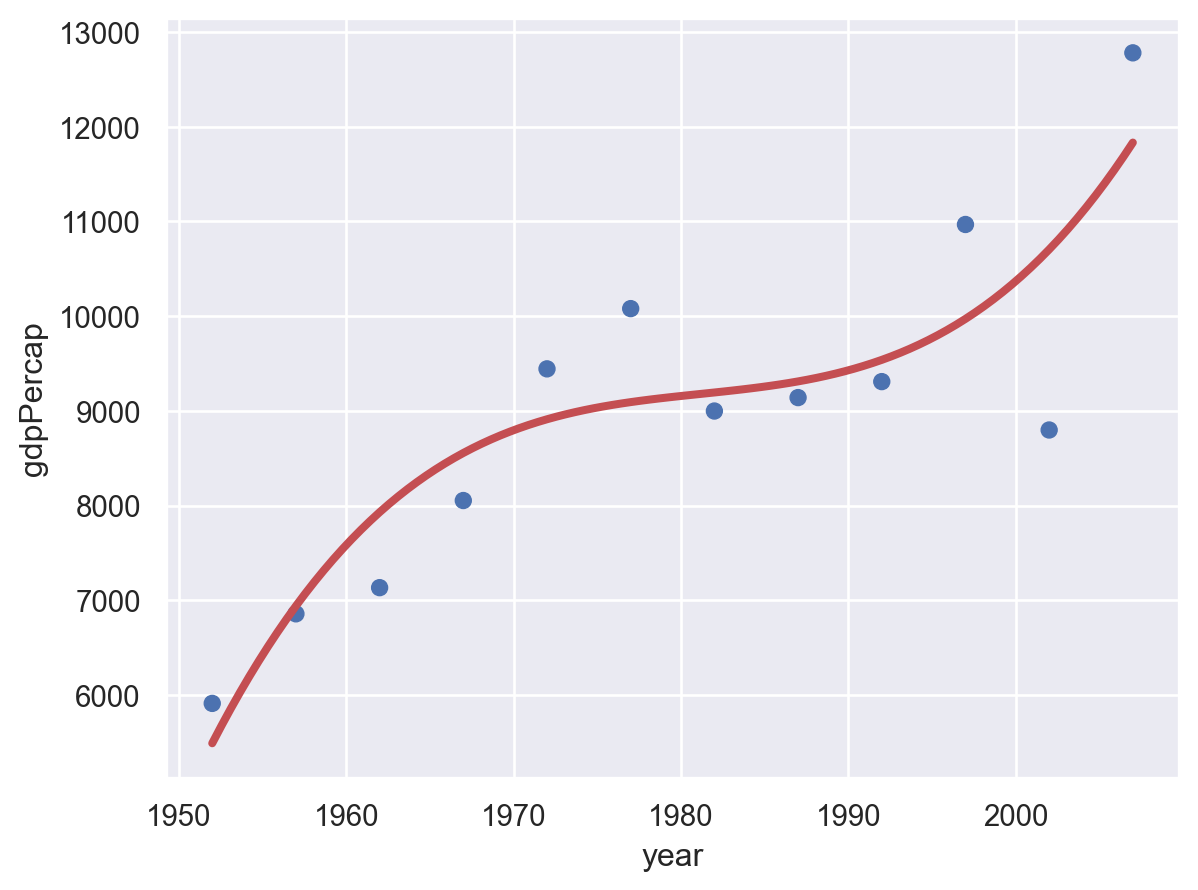

In [27]:
datos_arg = gapminder[gapminder['country']=="Argentina"]
(
    so.Plot(data=datos_arg, x=datos_arg['year'], y='gdpPercap')
    .add(so.Dot())
    # Acá es donde especificamos el grado del polinomio, en este caso es de grado 3
    .add(so.Line(color='r', linewidth=3), so.PolyFit(3))
)

#### Otro ejemplo con el dataset de tips.

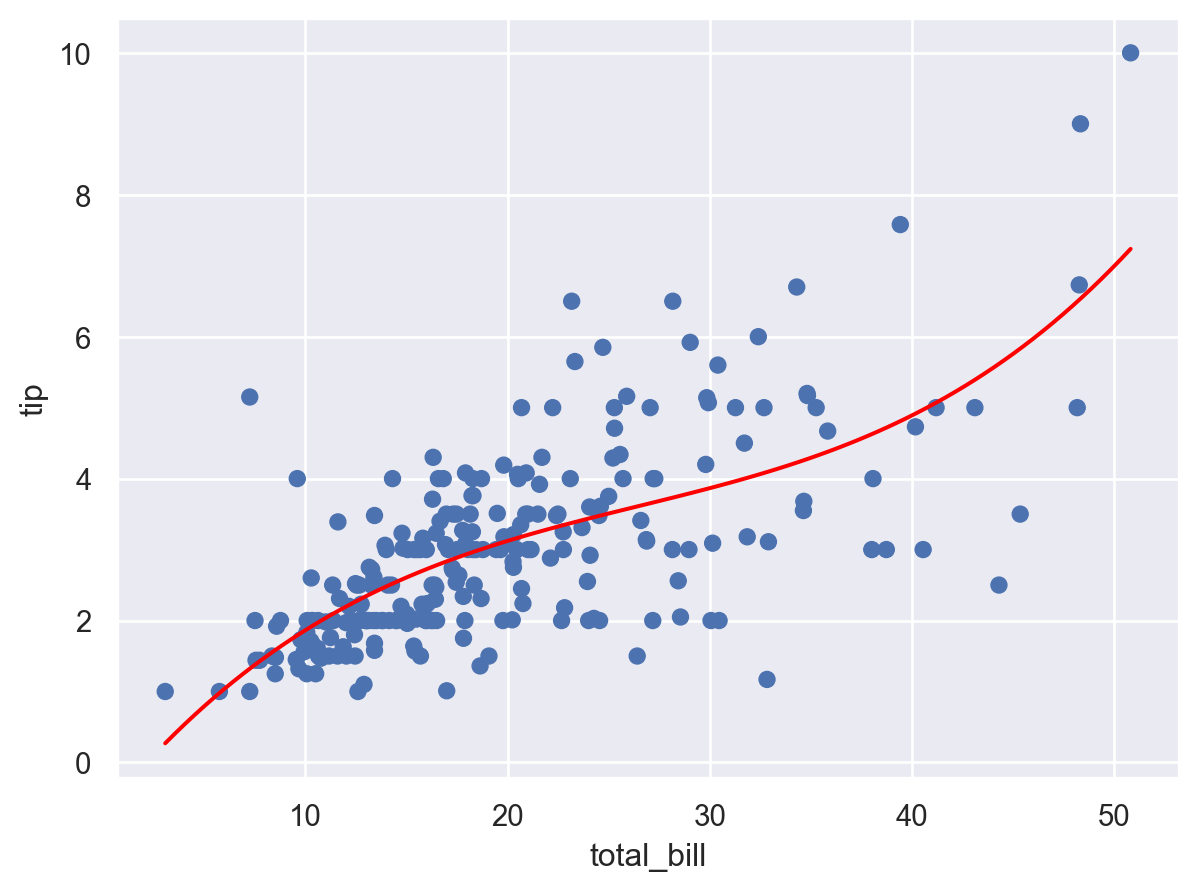

In [28]:
(
    so.Plot(data=datos_tips, x="total_bill", y="tip")
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(3))
)

#### El problema con este método es que no podemos calcular los coeficientes del polinomio. Simplemente, nos permite visualizarlo. Veamos el método 2.

### Método 2: Usar `sklearn`

#### En este método, utilizamos la clase `PolynomialFeatures` de la librería `sklearn.preprocessing`. Y luego, realizamos un `fit_transform` a nuestros datos. 

#### El `fit_transform` nos devuelve una matriz con los datos originales y los datos  originales elevados a la potencia de 1 a n, que es lo que necesitamos para hacer la regresión lineal.

#### En este ejemplo, podemos observar que genera un `numpy` array, con todos los valores de `total_bill` elevados a la potencia de 1 a 3.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Indicamos que queremos un polinomio de grado 3, sin ordenada al origen
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)

x_poly = polynomial_features.fit_transform(datos_tips[['total_bill']])

# Mostramos solo los primeros 5 valores
x_poly[0:5]

array([[1.69900000e+01, 2.88660100e+02, 4.90433510e+03],
       [1.03400000e+01, 1.06915600e+02, 1.10550730e+03],
       [2.10100000e+01, 4.41420100e+02, 9.27423630e+03],
       [2.36800000e+01, 5.60742400e+02, 1.32783800e+04],
       [2.45900000e+01, 6.04668100e+02, 1.48687886e+04]])

#### Y luego utilizamos el método `fit()` de `LinearRegression` para ajustar el modelo a los datos como venimos haciendo.

In [30]:
# Instanciamos el LinearRegression como hicimos antes
modelo_poly = linear_model.LinearRegression()

# Ajustamos los datos a nuestro modelo. Recordar:
# Primer parámetro: los x del polinomio que generamos en la celda de Python anterior
# Segundo parámetro, las y de nuestro dataset de tips.
modelo_poly.fit(x_poly, datos_tips['tip'])

print("Los coeficientes de nuestro polinomio:", modelo_poly.coef_)
print("La ordenada al origen:", modelo_poly.intercept_)

# En caso que querramos obtener un valor en particular, sabemos que nos devuelve un
# Array así que simplemente lo obtenemos a partir de su índice:
print("El segundo coeficiente de nuestro polinomio:", modelo_poly.coef_[1])

Los coeficientes de nuestro polinomio: [ 3.49076248e-01 -1.05394946e-02  1.32767507e-04]
La ordenada al origen: -0.7058888165393635
El segundo coeficiente de nuestro polinomio: -0.010539494628106183


#### Con esto vemos que el polinomio que mejor ajusta estos datos es:

#### $$ Y = -0.7058 + 0.3490 X -0.0105 X^2 + 0.00013 X^3$$

#### Veamos si este polinomio y el que calculamos con Seaborn Objects son iguales.

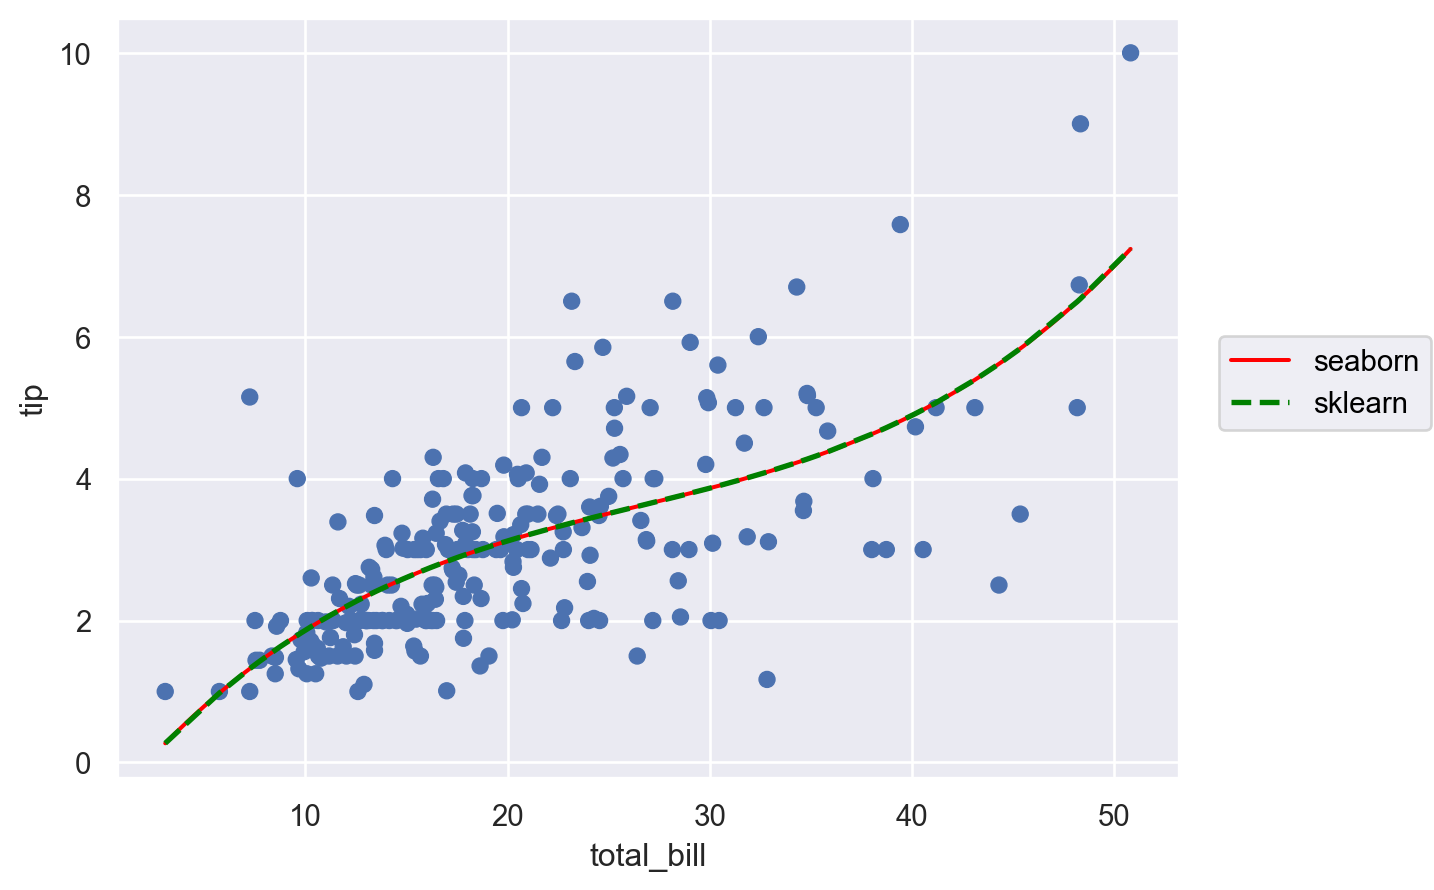

In [31]:
(
    so.Plot(data=datos_tips, x="total_bill", y="tip")
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(3), label="seaborn")
    .add(
        so.Line(color='green', linewidth=2,
                linestyle="--"),
        y=modelo_poly.intercept_.item() +
        modelo_poly.coef_[0]*datos_tips['total_bill'] +
        modelo_poly.coef_[1]*datos_tips['total_bill']**2 +
        modelo_poly.coef_[2]*datos_tips['total_bill']**3,
        label='sklearn')

)

#### Efectivamente, son iguales.

#### Para calcular un valor específico, podemos usar el método `predict()`.

In [32]:
prediccion = modelo_poly.predict([[30,30**2, 30**3]]).item()

print("Si la cuenta es de $30, predecimos un valor de $", prediccion, "para la propina.")

Si la cuenta es de $30, predecimos un valor de $ 3.8655761619820814 para la propina.


#### Ahora, calculamos la medida de desempeño $R^2$. 

#### Es **importante** que, cuando predecimos, utilicemos los valores de X obtenidos con `fit_transform()` en `PolynomialFeatures`!

In [33]:
# Recordar, x_poly lo calculamos usando PolynomialFeatures más arriba. No podemos pasarle simplemente el x de total_bill
# del DataFrame porque tiene dimensión 1. Y nuestro modelo recibe 3 valores, x^1, x^2 y x^3!
y_pred_poly = modelo_poly.predict(x_poly)

# Ahora sí, calculemos nuestro R cuadrado
r2 = r2_score(datos_tips['tip'], y_pred_poly)

print("El valor de R^2 de nuestro modelo polinomial de grado 3 es:", r2)

El valor de R^2 de nuestro modelo polinomial de grado 3 es: 0.4728729406559251


#### Y el valor cuadrático medio (ECM ó MSE en inglés). El ECM mide qué tan lejos están las predicciones del valor real. Usamos el método `mean_squared_error()` de `sklearn.metrics`.

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(datos_tips['tip'], y_pred_poly)

print("El ECM de nuestro modelo polinomial de grado 3 es de", mse)

El ECM de nuestro modelo polinomial de grado 3 es de 1.0050249385127352


## 🧮 Sistema de Ecuaciones Lineales

### Los sistemas de ecuaciones lineales son un conjunto de ecuaciones lineales que comparten las mismas variables.

### Podemos calcularlo con el método `solve()` de `numpy.linalg`.

### Ejemplo:

#### Imaginemos que un restaurante compra ingredientes para preparar sus platos (carne, vegetales y especias), pero no sabemos cuáanto cuesta cada ingrediente. Sin embargo, sabemos cuánto gastó en total al final de cada día y cuántos ingredientes compró.

#### **Día 1**: Compró **dos** unidades de carne, **una** de vegetales y **tres** de especias. Gastó un total de **$13.5**
#### **Día 2**: Compró **tres** unidades de carne, **cuatro** de vegetales y **una** de especias. Gastó un total de **$23.5**
#### **Día 3**: Compró **una** unidad de carne, **una** de vegetales y **dos** de especias. Gastó un total de **$8**

In [35]:
# Hacemos un diccionario y luego lo convertimos a un DataFrame
# Con la función from_dict(dict)

ingredientes_diarios = {
    'carne':        [2, 3, 1],
    'vegetales':    [1, 4, 1],
    'especias':     [3, 1, 2],
    'total':        [13.5, 23.5, 8],
}

df_ingredientes = pd.DataFrame.from_dict(ingredientes_diarios)

df_ingredientes

,carne,vegetales,especias,total
0,2,1,3,13.5
1,3,4,1,23.5
2,1,1,2,8.0


#### Para resolver este problema, necesitamos plantear un sistema de ecuaciones lineales. Para esto, separamos nuestro DataFrame en dos partes: una matriz de coeficientes y un vector de términos independientes.

In [36]:
X = df_ingredientes[["carne", "vegetales", "especias"]]
y = df_ingredientes[["total"]]

display(X)
display(y)

,carne,vegetales,especias
0,2,1,3
1,3,4,1
2,1,1,2


,total
0,13.5
1,23.5
2,8.0


#### Si queremos cuánto vale cada ingrediente, necesitamos resolver el siguiente sistema de ecuaciones lineales:

#### $$ 2x + 1y + 3z = 13.5 $$
#### $$ 3x + 4y + 1z = 23.5 $$
#### $$ 1x + 1y + 2z = 8 $$

#### con $x$ la cantidad de carne, $y$ la cantidad de vegetales y $z$ la cantidad de especias que compra el restaurante por día.

#### Podemos resolverlo con el método `solve()` de `numpy.linalg`. Tenemos que pasar como parametros la matriz de coeficientes y el vector de términos independientes.

In [37]:
import numpy as np

coeficientes = np.linalg.solve(X, y)
display(coeficientes)

array([[5. ],
       [2. ],
       [0.5]])

#### Esto nos dice que la carne cuesta $5, los vegetales $2 y las especias $0.5.

#### Podemos verificarlo multiplicando la matriz de coeficientes por el vector solución.

In [38]:
X @ coeficientes

,0
0,13.5
1,23.5
2,8.0


#### Supongamos que ahora no tenemos solamente tres días, sino que tenemos una semana. Podemos plantear un sistema de ecuaciones lineales con la misma matriz de coeficientes y un vector de términos independientes con los gastos de cada día.

#### En este caso, lo más seguro es que no haya una solución exacta, pero podemos encontrar la solución que minimice el error cuadrático medio. Para esto, utilizamos el método `lstsq()` de `numpy.linalg`.

In [39]:
ingredientes_diarios = {
    'carne':        [2, 3, 1, 3, 1, 2],
    'vegetales':    [1, 4, 1, 3, 2, 2],
    'especias':     [3, 1, 2, 1, 3, 4],
    'total':        [13.5, 23.5, 8, 12, 21, 10],
}

df_ingredientes_diarios = pd.DataFrame.from_dict(ingredientes_diarios)
X = df_ingredientes_diarios[["carne", "vegetales", "especias"]]
y = df_ingredientes_diarios[['total']]
coeficientes = np.linalg.lstsq(X, y, rcond=None)

print("Los coeficientes son", coeficientes[0].flatten())

Los coeficientes son [-2.73443092  6.87007874  2.11846815]


#### Como vemos, esos son los valores de los coeficientes que más se ajustan a los datos, aunque no son exactos ni tampoco tienen sentido en este contexto (por ejemplo, no puede haber un precio negativo).

## ⨐ formulaic

### formulaic es una librería que nos permite construir combinaciones de variables predictoras para hacer regresiones lineales.

### Veamos qué operaciones podemos hacer con formulaic:


| Operador | Ejemplo          | Función                                                                                           |
|:---------|:-----------------|:---------------------------------------------------------------------------------------------------|
| ~        | y ~ x            | Separa la variable (y) respuesta a la izquierda, de el/los predictor/es a la derecha (x).       |
| +        | y ~ x + z        | Adiciona (suma) términos al modelo.                                                              |
| :        | y ~ x : z        | Interacción entre términos. y es lineal en x ⋅ z.                                                |
| *        | y ~ x * z        | Combina adición e interacción entre términos. y ~ x * z es equivalente a y ~ x + z + x : z       |

### El método que más utilizamos en formulaic es get_model_matrix(). Este método nos devuelve una matriz con los valores de las variables predictoras y la variable respuesta.

### **Es importante entender que formulaic no "resuelve" la regresión lineal, sino que nos permite construir las combinaciones de variables predictoras que queremos utilizar en el modelo.**

### Veamos algunos ejemplos.

#### Ejemplo 1: Dataset penguins

In [40]:
# Desde seaborn objects importamos el dataset penguins
penguins = sns.load_dataset('penguins')

# Verificamos que nos genera un DataFrame
print(type(penguins))

penguins.head()

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##### Supongamos que queremos predecir el peso de un pingüino en función de su longitud de aleta y su especie. Podemos plantear un modelo de regresión lineal con la fórmula `body_mass_g ~ flipper_length_mm + species`.

##### Esa formula la pasamos como un string al constructor de formulaic. Y luego, utilizamos el método `get_model_matrix()` para obtener la matriz de datos.

##### Una ventaja de formulaic es que convierte las variables categoricas en variables dummies. Es decir, si tenemos una variable categórica con n categorías, nos genera n-1 variables dummies.

In [41]:
from formulaic import Formula

# Generamos la formula en formulaic, y generamos el model_matrix:
y, X = Formula("body_mass_g ~ flipper_length_mm + species").get_model_matrix(penguins)

# Veamos que hay en X
X.head()

,Intercept,flipper_length_mm,species[T.Chinstrap],species[T.Gentoo]
0,1.0,181.0,0,0
1,1.0,186.0,0,0
2,1.0,195.0,0,0
4,1.0,193.0,0,0
5,1.0,190.0,0,0


##### Observemos en la tabla anterior que la columna `species` ha sido convertida en dos columnas: `species[T.Chinstrap]` y `species[T.Gentoo]`. Esas son las variables dummies que nos generó formulaic.

##### Y, si observamos `y`, efectivamente vemos que es la variable que queremos predecir.

In [42]:
y.head()

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0


##### Ahora, simplemente ajustamos un modelo de regresión lineal con la matriz de datos que nos devolvió formulaic utilizando el método `fit()` de `LinearRegression` como venimos haciendo.

In [43]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X, y)

LinearRegression(fit_intercept=False)

##### Veamos los coeficientes de la regresión y calculamos el $R^2$.

In [44]:
coeficientes = modelo.coef_

y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

print("Los coeficientes de mi regresión son", modelo.coef_)
print("El R2 es", r2)

Los coeficientes de mi regresión son [[-4031.47689069    40.70540078  -206.51012034   266.80960318]]
El R2 es 0.7826479015540246


#### Ejemplo 2: penguins con variables combinadas

##### Formulaic también nos permite realizar combinaciones lineales de variables. Por ejemplo, si queremos predecir el peso de un pingüino en función de la longitud de su aleta y la interacción entre la longitud de su aleta y su especie, podemos plantear un modelo de regresión lineal con la fórmula `body_mass_g ~ flipper_length_mm + flipper_length_mm:species`. 

##### También, agregamos la columna `island` para que formulaic nos genere las variables dummies.

In [45]:
y, X = Formula('body_mass_g ~ flipper_length_mm + island + flipper_length_mm:species').get_model_matrix(penguins)
X.sample(5)

,Intercept,flipper_length_mm,island[T.Dream],island[T.Torgersen],flipper_length_mm:species[T.Chinstrap],flipper_length_mm:species[T.Gentoo]
131,1.0,197.0,0,1,0.0,0.0
106,1.0,199.0,0,0,0.0,0.0
229,1.0,215.0,0,0,0.0,215.0
100,1.0,192.0,0,0,0.0,0.0
234,1.0,210.0,0,0,0.0,210.0


##### Y ahora sí, entrenamos normalmente un modelo de regresión lineal con la matriz de datos que nos devolvió formulaic.

In [46]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X, y)

y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

print("Los coeficientes de mi modelo son", modelo.coef_)
print("El r2 es", r2)

Los coeficientes de mi modelo son [[-3.92483224e+03  4.04004508e+01 -5.05520892e+01 -9.32029818e+01
  -1.04232030e+00  1.05404637e+00]]
El r2 es 0.7845616505936128


##### De nuevo, formulaic **no** "resuelve" la regresión lineal, sino que nos permite construir las combinaciones de variables predictoras que queremos utilizar en el modelo.

## ⧉ K-Fold Cross Validation

### K-Fold Cross Validation es una técnica que nos permite dividir nuestro dataset en `k` partes iguales, entrenar nuestro modelo en `k-1` partes y evaluarlo en la parte restante.

![title](train_test_split.png)

### `train_test_split` de `sklearn.model_selection` nos permite dividir nuestro dataset en dos partes: una para entrenar el modelo y otra para evaluarlo.

 ### Es una forma de K-Fold Cross Validation con `k=2`. Es decir, dividimos nuestro dataset en dos partes iguales, entrenamos el modelo en una parte y lo evaluamos en la otra.

## ⌿ Regresión Ridge

### La regresión Ridge es un modelo de regresión lineal parecido a la regresión lineal simple, pero con una diferencia: penaliza los coeficientes de la regresión. Penalizar coeficientes significa que, si son muy grandes, los reduce.

### La regresión Ridge minimiza la siguiente función de costo:

### $$ RSS(\beta) + \alpha \displaystyle\sum_{j=1}^p \beta_j^2 $$

### donde $\alpha$ es un hiperparámetro que penaliza los coeficientes. Si $\alpha=0$, la regresión Ridge es equivalente a una regresión lineal simple.

### Para hacer una regresión Ridge, utilizamos la clase `Ridge` de `sklearn.linear_model`, y podemos asignar un valor a $\alpha$ con el argumento `alpha`.

### Los métodos que vamos a utilizar en este modelo son los mismos que en la regresión lineal simple:

### - `fit()`: Ajusta el modelo a los datos.
### - `coef_`: Nos devuelve los coeficientes de la regresión.
### - `intercept_`: Nos devuelve el intercepto u ordenada al origen de la regresión.
### - `predict()`: Nos permite hacer predicciones.

### Ejemplo, de nuevo con penguins.

#### Supongamos que queremos predecir el peso de un pingüino en función de su longitud de aleta, su especie y la interacción entre la longitud de su aleta y su especie. Podemos plantear un modelo de regresión lineal con la fórmula `body_mass_g ~ flipper_length_mm + species + flipper_length_mm:species`.

#### En este caso agregamos un paso posterior, que es normalizar o escalar los datos. Esto es importante porque la regresión Ridge penaliza los coeficientes, y si tenemos variables en distintas escalas, la penalización no va a ser justa.

In [47]:
from sklearn.preprocessing import StandardScaler

y, X = Formula('body_mass_g ~ flipper_length_mm + species + flipper_length_mm:species').get_model_matrix(penguins)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Primero, hagamos una regresión lineal simple a partir de la matriz de datos que nos devolvió formulaic.

In [48]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_scaled, y)

LinearRegression(fit_intercept=False)

#### Ahora, hagamos un gráfico para ver todos los coeficientes de la regresión lineal simple.

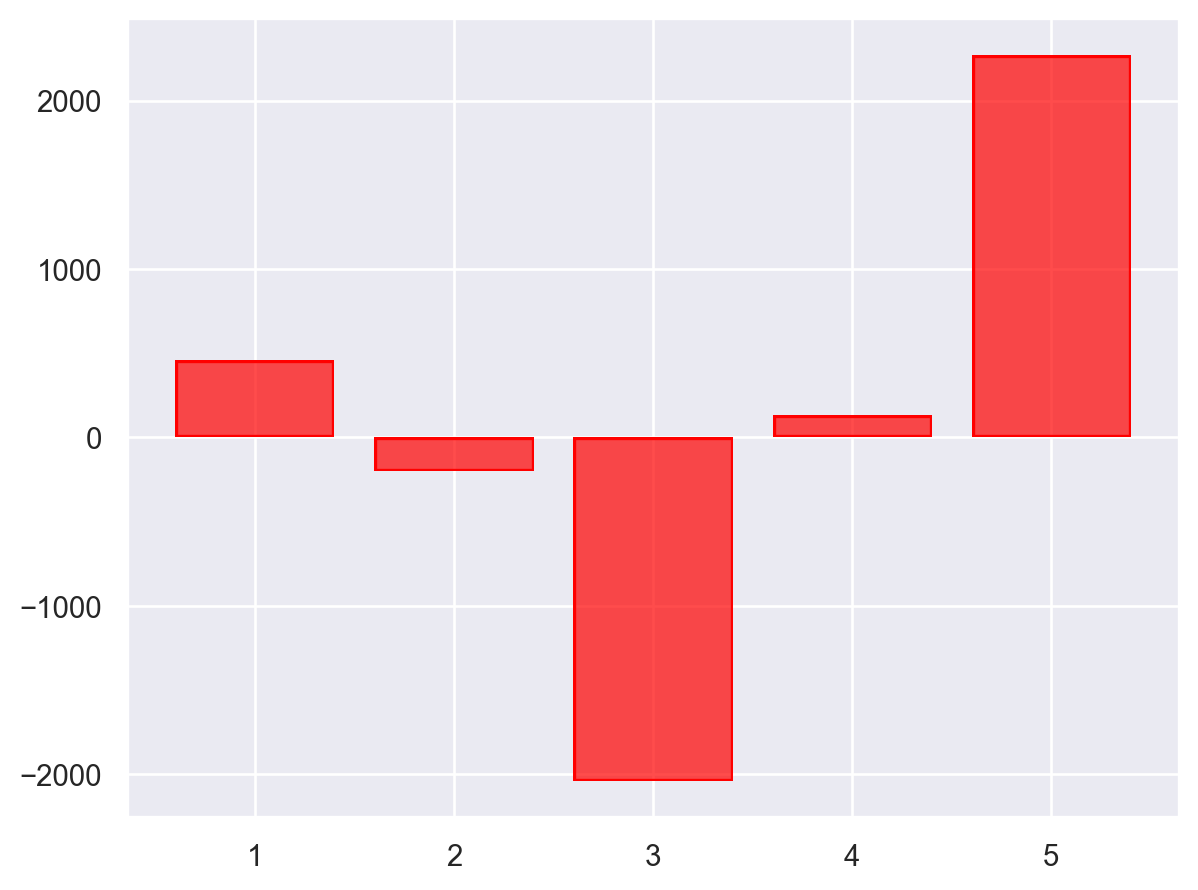

In [49]:
rango_coeficientes = np.arange(0, len(modelo.coef_.flatten()))

so.Plot(x=rango_coeficientes, y= modelo.coef_.flatten()).add(so.Bar(color="red"))

#### Vemos que los valores de los coeficientes son muy grandes. Esto es un indicio de que el modelo está sobreajustando los datos.

#### Ahora, hagamos una regresión Ridge con el mismo dataset. Utilizamos la clase `Ridge` de `sklearn.linear_model` y asignamos un valor a $\alpha$ con el argumento `alpha`.

#### Probemos, en un principio, con $\alpha=1$.

In [50]:
modelo_ridge = linear_model.Ridge(alpha=0.5, fit_intercept=False)
modelo_ridge.fit(X_scaled, y)

Ridge(alpha=0.5, fit_intercept=False)

#### Y hacemos un gráfico para ver los coeficientes de la regresión Ridge.

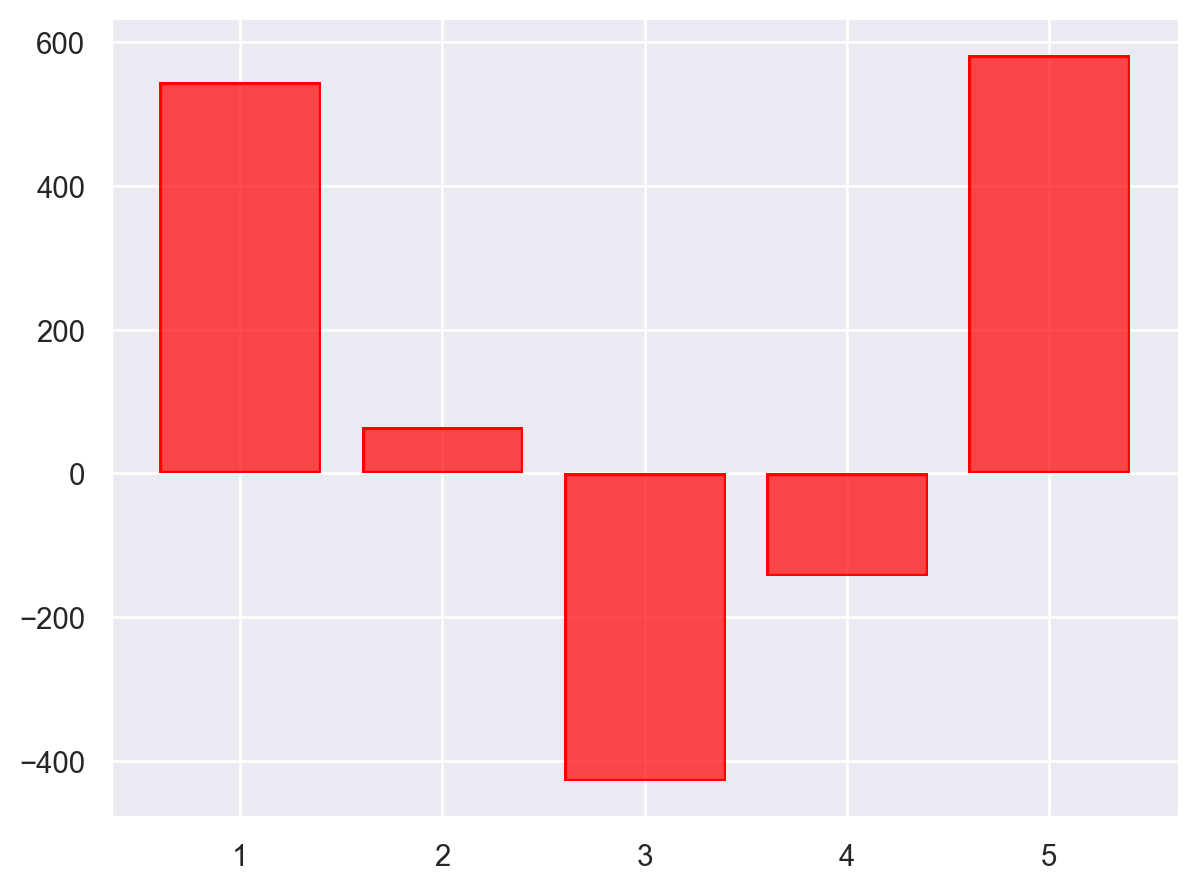

In [51]:
rango_coeficientes = np.arange(0, len(modelo_ridge.coef_.flatten()))

so.Plot(x=rango_coeficientes, y= modelo_ridge.coef_.flatten()).add(so.Bar(color="red"))

#### Vemos que los coeficientes son más pequeños que en la regresión lineal simple. Esto es porque la regresión Ridge penaliza los coeficientes.

## 🔧 Operaciones con Diccionarios, Listas y DataFrames

### Hay muchas operaciones que podemos hacer con diccionarios, listas y DataFrames de pandas. Veamos algunas de ellas.

### Renombrar columnas de un DataFrame

#### Tenemos dos formas de renombrar columnas de un DataFrame de pandas. La primera es utilizando el método `rename()` y la segunda es utilizando la asignación directa.

In [52]:
from sklearn.datasets import load_wine

# Acá creamos el df de wine de sklearn. Le pasamos 
# el parámetro as_frame para que me lo convierta a un
# DataFrame y no a un array.
wine_df = load_wine(as_frame=True).data

type(wine_df)

pandas.core.frame.DataFrame

In [69]:
# Cambiamos el nombre de la columna magnesium a "Magnesio"
# y color_intensity a "IntensidadColor"
wine_df = wine_df.rename(columns={'magnesium': 'Magnesio', 'color_intensity': 'IntensidadColor'})

wine_df.head()

,ALCOHOL,MALIC_ACID,ASH,ALCALINITY_OF_ASH,MAGNESIO,TOTAL_PHENOLS,FLAVANOIDS,NONFLAVANOID_PHENOLS,PROANTHOCYANINS,INTENSIDADCOLOR,HUE,OD280/OD315_OF_DILUTED_WINES,PROLINE
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### Podemos también utilizar funciones para cambiar el nombre de las columnas. Por ejemplo, si queremos cambiar el nombre de las columnas a mayúsculas, podemos utilizar la función `str.upper()`.

In [66]:
def mayusculas(text):
    return str.upper(text)

wine_df = wine_df.rename(mayusculas, axis="columns")
wine_df.head() 

,ALCOHOL,MALIC_ACID,ASH,ALCALINITY_OF_ASH,MAGNESIO,TOTAL_PHENOLS,FLAVANOIDS,NONFLAVANOID_PHENOLS,PROANTHOCYANINS,INTENSIDADCOLOR,HUE,OD280/OD315_OF_DILUTED_WINES,PROLINE
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Eliminar datos faltantes en un DataFrame

#### Podemos eliminar datos faltantes en un DataFrame de pandas con el método `dropna()`. Este método elimina todas las filas que contienen al menos un valor faltante.

In [70]:
wine_df.dropna()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ALCOHOL                       178 non-null    float64
 1   MALIC_ACID                    178 non-null    float64
 2   ASH                           178 non-null    float64
 3   ALCALINITY_OF_ASH             178 non-null    float64
 4   MAGNESIO                      178 non-null    float64
 5   TOTAL_PHENOLS                 178 non-null    float64
 6   FLAVANOIDS                    178 non-null    float64
 7   NONFLAVANOID_PHENOLS          178 non-null    float64
 8   PROANTHOCYANINS               178 non-null    float64
 9   INTENSIDADCOLOR               178 non-null    float64
 10  HUE                           178 non-null    float64
 11  OD280/OD315_OF_DILUTED_WINES  178 non-null    float64
 12  PROLINE                       178 non-null    float64
dtypes: float64

#### Es importante que, luego de eliminar los datos faltantes, reseteemos el índice del DataFrame con el método `reset_index()`.

In [73]:
wine_df_clean = wine_df.reset_index()
wine_df_clean.head()

,level_0,index,ALCOHOL,MALIC_ACID,ASH,ALCALINITY_OF_ASH,MAGNESIO,TOTAL_PHENOLS,FLAVANOIDS,NONFLAVANOID_PHENOLS,PROANTHOCYANINS,INTENSIDADCOLOR,HUE,OD280/OD315_OF_DILUTED_WINES,PROLINE
0,0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Operaciones con los indices de un DataFrame

#### Podemos sumar uno a todos los índices de un DataFrame de pandas con el parametro index del método `rename()`.

In [75]:
def sumar_uno(numero):
    return numero + 1

wine_df.rename(index = sumar_uno)
wine_df.head()

,index,ALCOHOL,MALIC_ACID,ASH,ALCALINITY_OF_ASH,MAGNESIO,TOTAL_PHENOLS,FLAVANOIDS,NONFLAVANOID_PHENOLS,PROANTHOCYANINS,INTENSIDADCOLOR,HUE,OD280/OD315_OF_DILUTED_WINES,PROLINE
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
